In [5]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Read data
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
housing_data.shape

(1460, 81)

# Data cleanup and missing data treatment

In [8]:
# Check for NA values
cols = (housing_data.isna().sum() > 0)
na_cols = cols[(cols==True)]
na_cols

LotFrontage     True
Alley           True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
FireplaceQu     True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
PoolQC          True
Fence           True
MiscFeature     True
dtype: bool

In [9]:
housing_data.LotFrontage.isna().sum()

259

In [10]:
housing_data.Alley.isna().sum()

1369

In [11]:
housing_data.drop("Alley", axis=1, inplace=True)
housing_data.shape

(1460, 80)

In [12]:
cols = (housing_data.isna().sum() > 300)
na_cols = cols[(cols==True)]
na_cols

FireplaceQu    True
PoolQC         True
Fence          True
MiscFeature    True
dtype: bool

In [13]:
housing_data.MiscFeature.isna().sum()

1406

In [14]:
# drop cols with more than 300 NA values
housing_data.drop(na_cols.index, axis=1, inplace=True)
housing_data.shape

(1460, 76)

In [15]:
# Check for cols with more than 0 na values
cols = (housing_data.isna().sum() > 0)
na_cols = cols[(cols==True)]
na_cols

LotFrontage     True
MasVnrType      True
MasVnrArea      True
BsmtQual        True
BsmtCond        True
BsmtExposure    True
BsmtFinType1    True
BsmtFinType2    True
Electrical      True
GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageQual      True
GarageCond      True
dtype: bool

In [16]:
housing_data[na_cols.index].dtypes.index

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [17]:
housing_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
housing_data[["LotFrontage"]] = housing_data[["LotFrontage"]].fillna(housing_data.LotFrontage.median())

In [19]:
housing_data.LotFrontage.describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
housing_data[["MasVnrArea"]] = housing_data[["MasVnrArea"]].fillna(housing_data.MasVnrArea.median())
housing_data[["GarageYrBlt"]] = housing_data[["GarageYrBlt"]].fillna(housing_data.GarageYrBlt.median())

In [21]:
housing_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [22]:
housing_data[["MasVnrType"]] = housing_data[["MasVnrType"]].fillna("None")

In [23]:
housing_data.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [24]:
housing_data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [25]:
# If dtype is Object, impute missing values with "None"
housing_data[(housing_data[na_cols.index].dtypes=="object").index] = housing_data[(housing_data[na_cols.index].dtypes=="object").index].fillna("None")

In [26]:
cols = (housing_data.isna().sum() > 0)
na_cols = cols[(cols==True)]
na_cols

Series([], dtype: bool)

# EDA

In [27]:
housing_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [28]:
numeric_cols = housing_data.select_dtypes(include=[np.number])
numeric_cols.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
# checking correlations
corr = numeric_cols.corr()
print(corr["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [30]:
d = housing_data[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "KitchenAbvGr", "EnclosedPorch"]]
#d = housing_data[["SalePrice", "OverallQual"]]

<Figure size 1152x864 with 0 Axes>

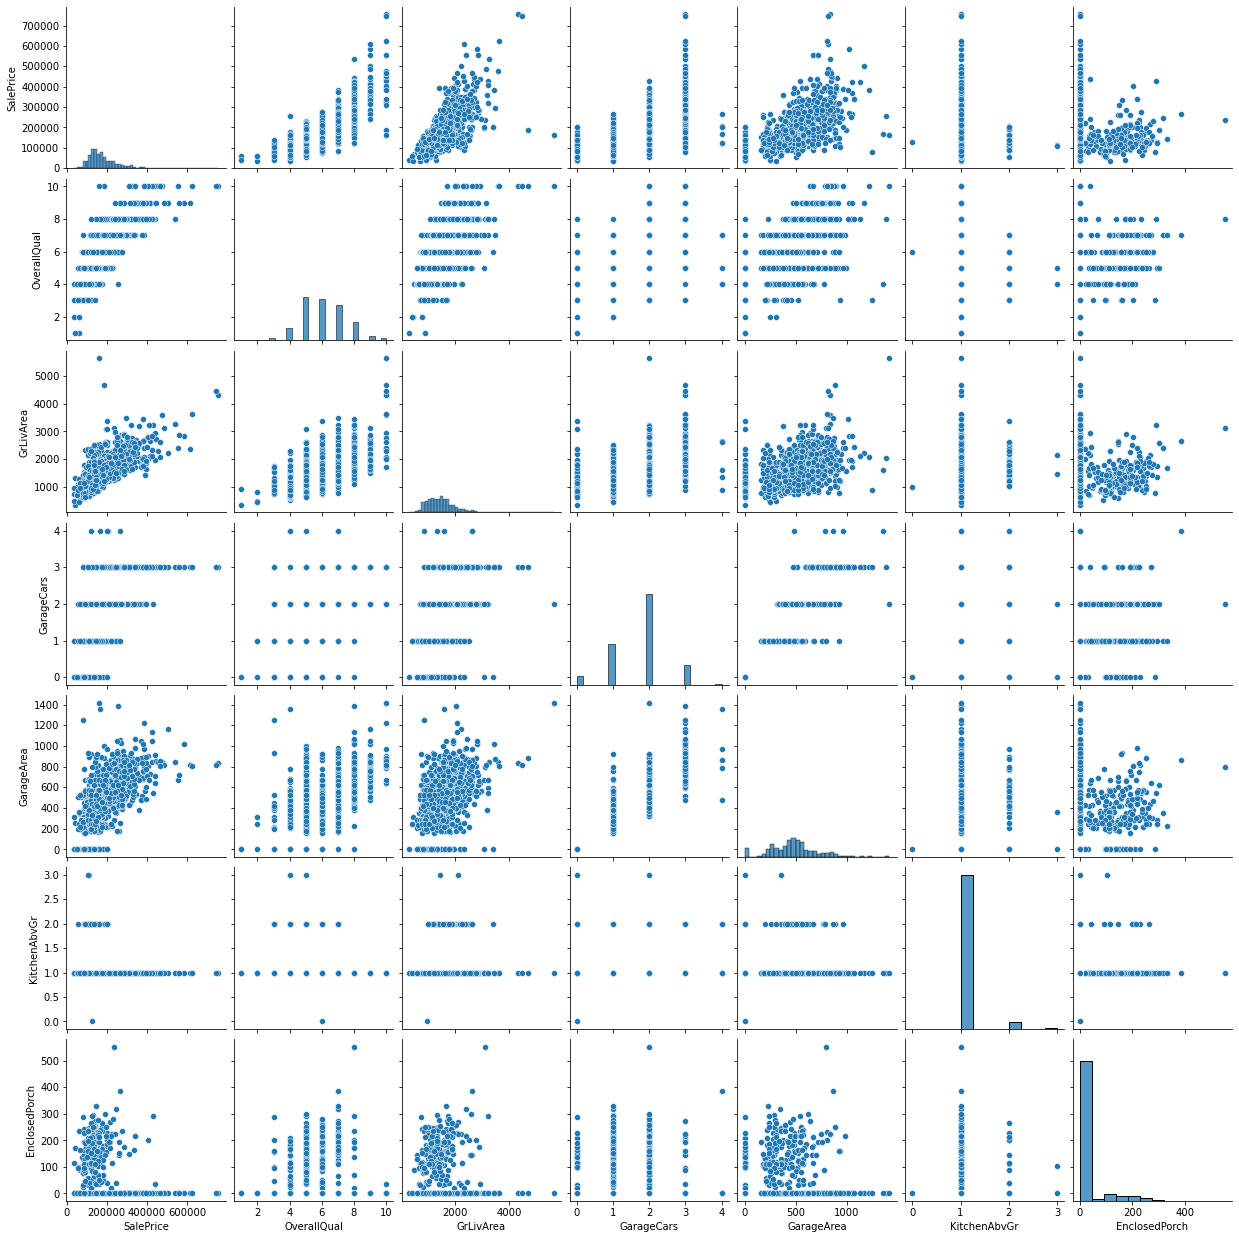

In [31]:
# Pair plot
plt.figure(figsize=(16, 12))
sns.pairplot(d)
plt.show()

GrLivArea, GarageArea, EnclosedPorch have linear relations with SalePrice. There are some outliers in all three predictors.

# Outliar treatment

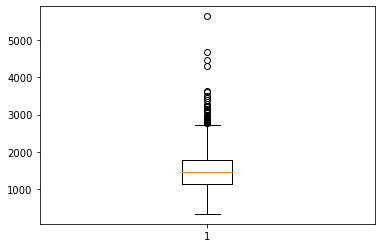

In [32]:
# Check outliars for numerical cols
plt.boxplot(housing_data.GrLivArea)
plt.show()

In [33]:
housing_data[(housing_data.GrLivArea>3000)].shape

(18, 76)

In [34]:
#Remove GrLivArea > 3000
housing_data = housing_data[(housing_data.GrLivArea<3000)]
housing_data.shape

(1442, 76)

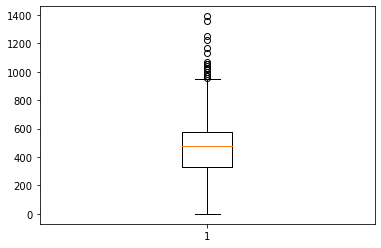

In [35]:
plt.boxplot(housing_data.GarageArea)
plt.show()

In [36]:
housing_data[(housing_data.GarageArea>1000)].shape

(13, 76)

In [37]:
housing_data = housing_data[(housing_data.GarageArea<1000)]
housing_data.shape

(1429, 76)

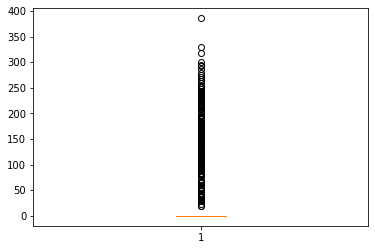

In [38]:
plt.boxplot(housing_data.EnclosedPorch)
plt.show()

In [39]:
housing_data.EnclosedPorch.describe()

count    1429.000000
mean       21.840448
std        59.660792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       386.000000
Name: EnclosedPorch, dtype: float64

In [40]:
housing_data[(housing_data.EnclosedPorch>30)].shape

(202, 76)

In [41]:
housing_data = housing_data[(housing_data.EnclosedPorch<30)]
housing_data.shape

(1226, 76)

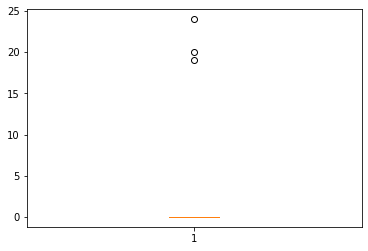

In [42]:
plt.boxplot(housing_data.EnclosedPorch)
plt.show()

In [43]:
housing_data = housing_data[(housing_data.OverallQual < 10)]
housing_data = housing_data[(housing_data.GarageCars < 4)]
housing_data = housing_data[(housing_data.KitchenAbvGr < 3)]
housing_data.shape

(1212, 76)

In [44]:
# drop Id col
housing_data.drop("Id", axis=1, inplace=True)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000


Checking categorical columns

In [45]:
categorical_cols = housing_data.select_dtypes(exclude=[np.number])
categorical_cols.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212,...,1212,1212,1212,1212,1212,1212,1212,1212,1212,1212
unique,5,2,4,4,2,5,3,25,9,5,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,997,1207,738,1100,1211,880,1150,197,1061,1205,...,1128,593,1133,776,463,1114,1124,1146,1051,998


# Data prep for categorical cols

In [46]:
# Check number of unique values in categorical columns
categorical_cols.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        5
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      12
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         4
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [47]:
housing_data.Neighborhood.value_counts()

NAmes      197
CollgCr    148
Somerst     81
Edwards     80
Gilbert     79
NWAmes      68
NridgHt     65
Sawyer      63
OldTown     57
SawyerW     53
Mitchel     45
BrkSide     40
Timber      35
Crawfor     32
NoRidge     29
ClearCr     23
StoneBr     18
MeadowV     17
Blmngtn     17
BrDale      16
IDOTRR      15
SWISU       12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

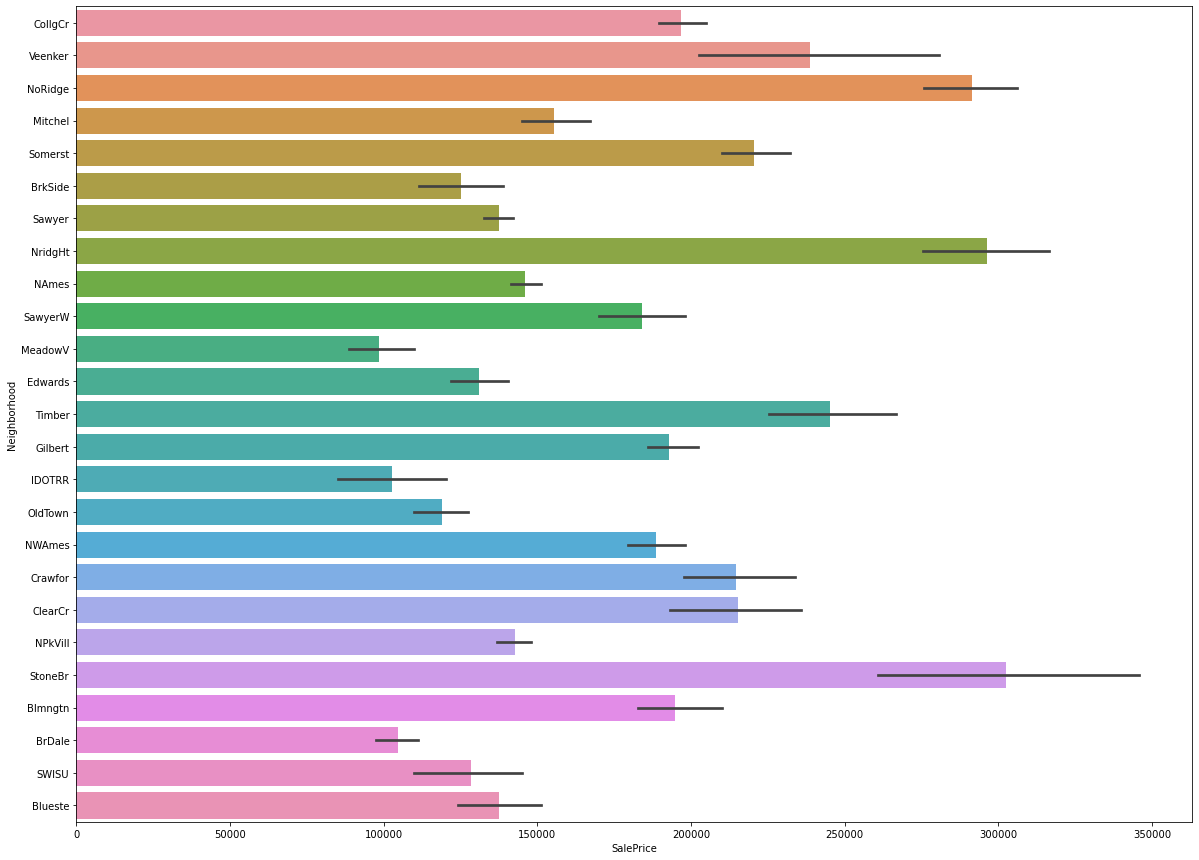

In [48]:
# barplot of Saleprice against categorical cols
plt.figure(figsize=(20, 15))
sns.barplot(y=housing_data.Neighborhood, x=housing_data.SalePrice)
plt.show()

In [49]:
# Divide into 4 categories - StoneBr, NridgHt, NoRidge, Other
housing_data.Neighborhood = housing_data.Neighborhood.apply(lambda x: x if ((x== "StoneBr") | (x== "NridgHt") | (x== "NoRidge")) else "Rest"  )
housing_data.Neighborhood.value_counts()

Rest       1100
NridgHt      65
NoRidge      29
StoneBr      18
Name: Neighborhood, dtype: int64

In [50]:
housing_data.Exterior1st.value_counts()

VinylSd    472
HdBoard    205
MetalSd    163
Wd Sdng    140
Plywood     98
CemntBd     51
BrkFace     38
WdShing     20
Stucco      12
AsbShng     10
BrkComm      2
AsphShn      1
Name: Exterior1st, dtype: int64

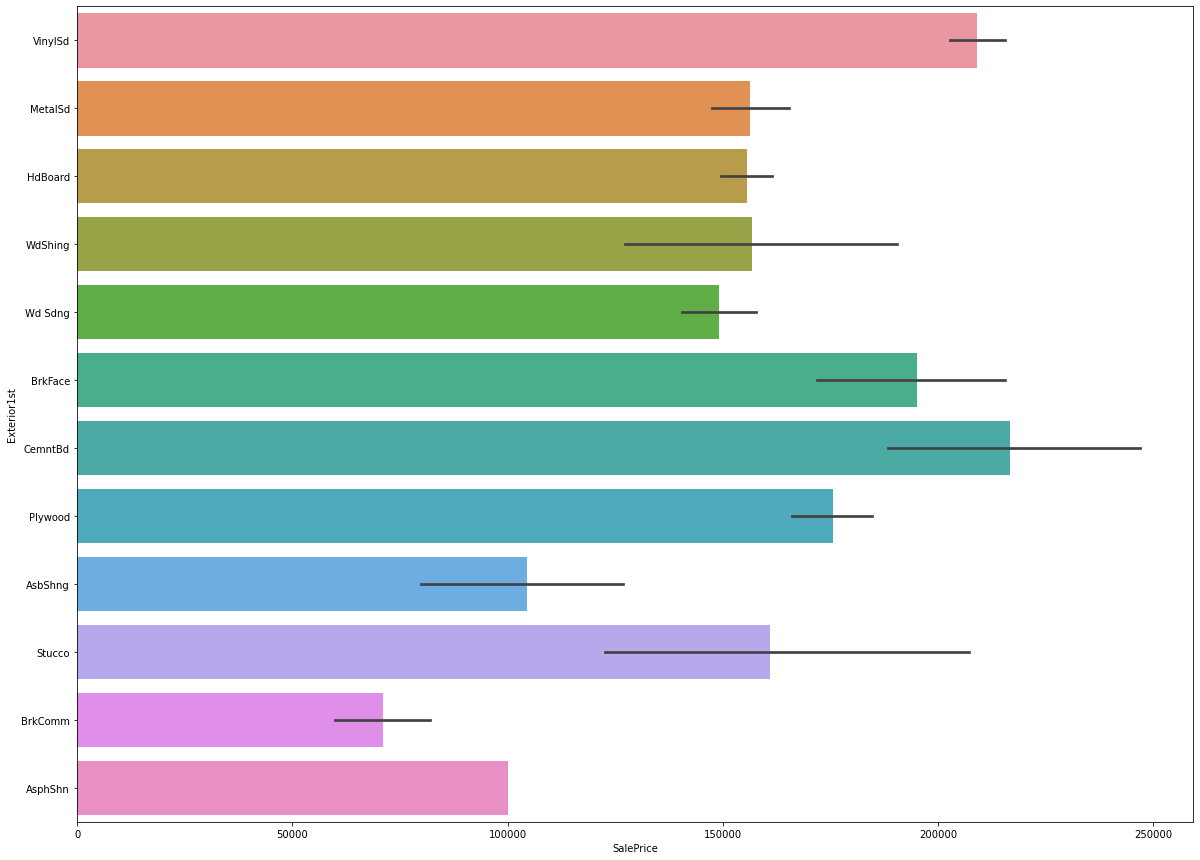

In [51]:
plt.figure(figsize=(20, 15))
sns.barplot(y=housing_data.Exterior1st, x=housing_data.SalePrice)
plt.show()

In [52]:
# Dividing in categories - VinylSd, CemntBd, BrkFace and Other
housing_data.Exterior1st = housing_data.Exterior1st.apply(lambda x: x if ((x== "VinylSd") | (x== "CemntBd") | (x== "BrkFace")) else "Rest"  )
housing_data.Exterior1st.value_counts()

Rest       651
VinylSd    472
CemntBd     51
BrkFace     38
Name: Exterior1st, dtype: int64

In [53]:
housing_data.Exterior2nd.value_counts()

VinylSd    463
HdBoard    188
MetalSd    159
Wd Sdng    141
Plywood    131
CmentBd     51
Wd Shng     21
BrkFace     19
Stucco      11
AsbShng      9
Brk Cmn      7
ImStucc      5
AsphShn      3
Stone        3
Other        1
Name: Exterior2nd, dtype: int64

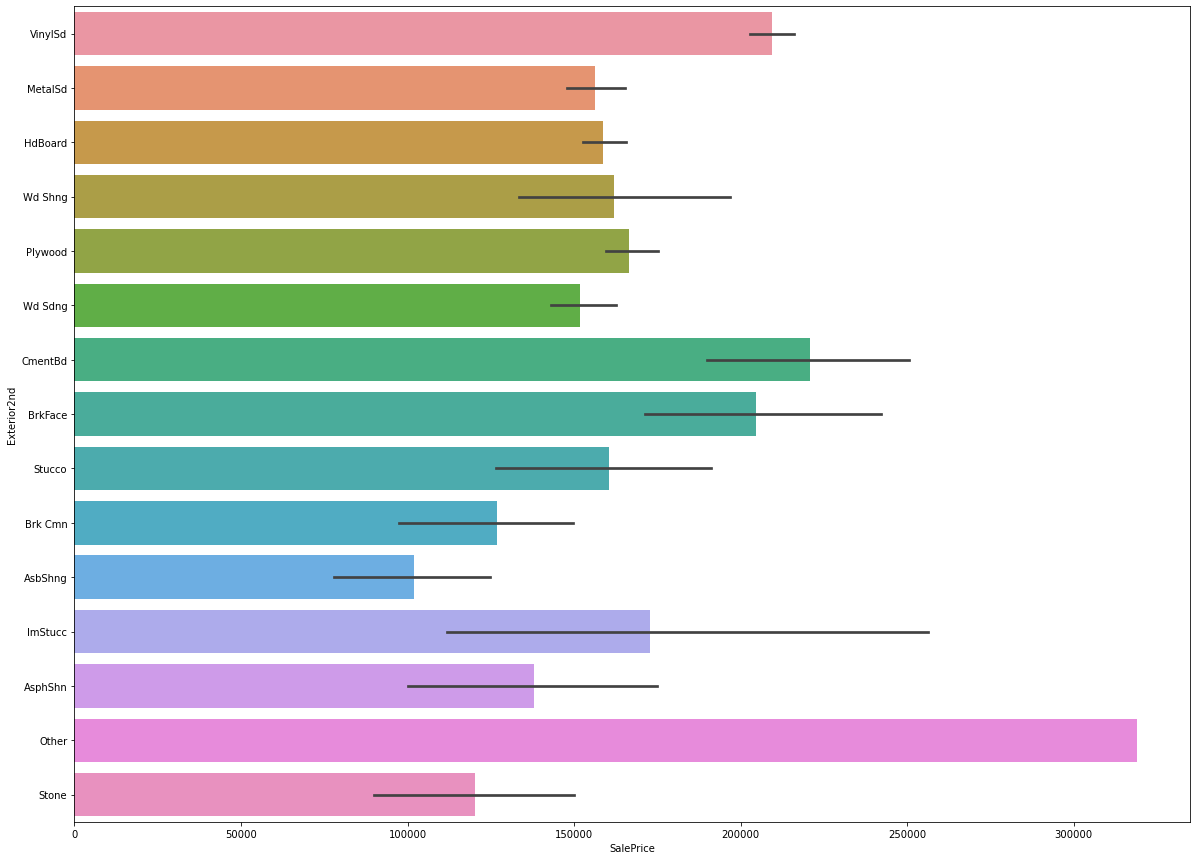

In [54]:
plt.figure(figsize=(20, 15))
sns.barplot(y=housing_data.Exterior2nd, x=housing_data.SalePrice)
plt.show()

In [55]:
# dividing into categories - Other, VinylSd, CmentBd and Rest
housing_data.Exterior2nd = housing_data.Exterior2nd.apply(lambda x: x if ((x== "VinylSd") | (x== "CmentBd") | (x== "Other")) else "Rest"  )
housing_data.Exterior2nd.value_counts()

Rest       697
VinylSd    463
CmentBd     51
Other        1
Name: Exterior2nd, dtype: int64

In [56]:
print(housing_data.GarageYrBlt.min())
print(housing_data.GarageYrBlt.max())

1900.0
2010.0


In [57]:
labels=["Very Old", "Old", "Moderate"]
bins = [1910, 1950, 1990, 2005]
housing_data["GarageYrBlt_range"] = pd.cut(housing_data.GarageYrBlt, bins=bins, labels=labels)
housing_data.GarageYrBlt_range.value_counts()

Old         579
Moderate    384
Very Old    106
Name: GarageYrBlt_range, dtype: int64

In [58]:
housing_data.drop("GarageYrBlt", axis=1, inplace=True)
housing_data.shape

(1212, 75)

In [59]:
# Create dummy values for categorical cols
enc_housing_data = pd.get_dummies(data=housing_data, drop_first=True)
enc_housing_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBlt_range_Old,GarageYrBlt_range_Moderate
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,1,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,1,0,0,1
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,1,0,0,0,1,0,0,1


# Check skewness for target variable Saleprice and transform it accordingly

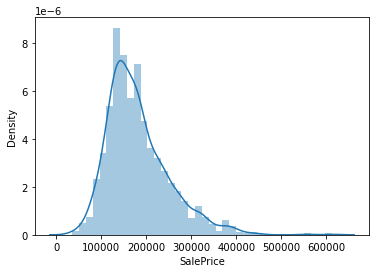

In [60]:
# Check target variable SalePrice
sns.distplot(enc_housing_data.SalePrice)
plt.show()

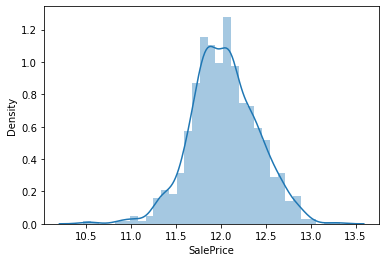

In [61]:
# SalePrice distribution is right-skewed, log transformation handles the skeweness to some extent
sns.distplot(np.log(enc_housing_data.SalePrice))
plt.show()

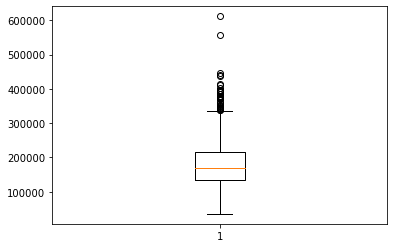

In [62]:
# boxplot of Saleprice shows some outliars
plt.boxplot(enc_housing_data.SalePrice)
plt.show()

In [63]:
enc_housing_data.SalePrice[(enc_housing_data.SalePrice>450000)].shape

(2,)

In [64]:
enc_housing_data = enc_housing_data[(enc_housing_data.SalePrice<450000)]
enc_housing_data.shape

(1210, 195)

In [65]:
# Divide into X and y
X = enc_housing_data.drop("SalePrice", axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBlt_range_Old,GarageYrBlt_range_Moderate
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,1,0,0,0,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,1,0,0,0,1,0,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,1,0,0,0,1,0,0,1
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,0,0,1,0,0,0,1,0,0,1


In [66]:
y = enc_housing_data.SalePrice
y.head()

0    208500
1    181500
2    223500
4    250000
5    143000
Name: SalePrice, dtype: int64

In [67]:
# log transformation of target
y = np.log(y)
y.head()

0    12.247694
1    12.109011
2    12.317167
4    12.429216
5    11.870600
Name: SalePrice, dtype: float64

In [68]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [69]:
numeric_cols.drop(['Id', 'GarageYrBlt', 'SalePrice'], axis=1, inplace=True)
X_train[numeric_cols.columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
261,60,69.0,9588,8,5,2007,2007,270.0,0,0,...,868,0,148,0,0,0,0,0,11,2007
424,20,72.0,9000,6,5,1956,1956,74.0,616,0,...,297,0,44,0,0,0,0,0,5,2008
1281,20,50.0,8049,7,5,1990,1990,54.0,1053,0,...,484,0,58,0,0,90,0,0,7,2006
1122,20,69.0,8926,4,3,1956,1956,0.0,0,0,...,288,64,0,0,0,160,0,0,10,2009
604,20,88.0,12803,7,5,2002,2002,99.0,922,0,...,530,192,36,0,0,0,0,0,9,2008


In [70]:
# Scale predictors
scale = MinMaxScaler()
X_train[numeric_cols.columns] = scale.fit_transform(X_train[numeric_cols.columns])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBlt_range_Old,GarageYrBlt_range_Moderate
261,0.235294,0.164384,0.049705,0.875,0.428571,0.978261,0.950000,0.168750,0.000000,0.0,...,1,0,0,0,0,0,0,1,0,0
424,0.000000,0.174658,0.046102,0.625,0.428571,0.608696,0.100000,0.046250,0.327660,0.0,...,0,0,1,0,0,0,1,0,1,0
1281,0.000000,0.099315,0.040274,0.750,0.428571,0.855072,0.666667,0.033750,0.560106,0.0,...,0,0,1,0,0,0,1,0,1,0
1122,0.000000,0.164384,0.045648,0.375,0.142857,0.608696,0.100000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
604,0.000000,0.229452,0.069407,0.750,0.428571,0.942029,0.866667,0.061875,0.490426,0.0,...,0,0,1,0,0,0,1,0,0,1


In [71]:
X_test[numeric_cols.columns] = scale.transform(X_test[numeric_cols.columns])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBlt_range_Old,GarageYrBlt_range_Moderate
910,0.411765,0.202055,0.062035,0.500,0.428571,0.637681,0.166667,0.225625,0.235638,0.0,...,0,0,1,0,0,0,1,0,1,0
1110,0.235294,0.164384,0.039974,0.625,0.428571,0.891304,0.766667,0.000000,0.116489,0.0,...,0,0,1,0,0,0,1,0,0,1
326,0.588235,0.037671,0.057414,0.875,0.428571,0.876812,0.716667,0.000000,0.861170,0.0,...,0,0,0,0,0,0,1,0,0,1
1355,0.352941,0.277397,0.053406,0.750,0.571429,0.695652,0.700000,0.089375,0.000000,0.0,...,0,0,1,0,0,0,1,0,1,0
38,0.000000,0.160959,0.039496,0.500,0.714286,0.586957,0.950000,0.000000,0.388830,0.0,...,0,0,1,0,0,0,0,0,1,0


# Ridge Regression

In [72]:
# hyperparameter alpha
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0 ]}

In [73]:
ridge = Ridge()

In [74]:
# 5 fold cross-validation
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring="neg_mean_absolute_error", cv=folds, 
                        return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0,
                                   20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [75]:
# check best alpha
best_alpha = model_cv.best_params_
best_alpha

{'alpha': 3.0}

In [76]:
# Ridge regression with best alpha
ridge_alpha3 = Ridge(alpha=3.0)
ridge_alpha3.fit(X_train, y_train)
ridge_alpha3.coef_

array([-6.12727913e-02,  4.86883361e-02,  1.38001889e-01,  2.90079650e-01,
        2.19950013e-01,  1.29069809e-01,  3.83248145e-02, -1.15456341e-02,
        1.45628925e-01,  5.13803209e-02,  4.60729023e-02,  1.77193977e-01,
        2.38256311e-01,  1.33417476e-01, -3.72276335e-03,  2.74311126e-01,
        2.79155110e-02, -1.93526208e-02,  8.15978895e-02,  3.90030513e-02,
        1.94837384e-02, -7.43619218e-02,  5.57733876e-02,  8.38636076e-02,
        8.52677582e-02,  8.29649559e-02,  7.67207424e-02,  7.17897147e-02,
        2.23278424e-02,  6.13994678e-02,  9.34489201e-02,  6.63507052e-02,
        1.66904501e-02,  2.32019247e-04, -9.61318719e-03,  1.31092495e-01,
        5.37639934e-02,  7.95687788e-02, -1.09756537e-02,  4.97399722e-03,
        8.40393967e-03,  3.15765605e-02,  9.22795732e-03,  1.47555168e-02,
       -1.26137612e-02, -1.40456764e-02,  0.00000000e+00,  4.71902116e-02,
       -3.40875430e-02,  9.45317386e-03, -2.01236828e-02,  2.37060555e-02,
       -7.50206771e-02,  

In [77]:
# Calculate R2 score, Mean squared error
y_pred_train = ridge_alpha3.predict(X_train)
y_pred_train

array([12.68124716, 11.86826563, 12.17866009, 11.464937  , 12.29903493,
       12.19097938, 12.17711609, 11.68585641, 12.52211126, 12.00002088,
       12.28989591, 11.54604227, 11.82076856, 11.94707586, 12.05697993,
       12.02643406, 11.75174349, 11.42086384, 11.73773327, 11.87571271,
       12.28759507, 12.26407221, 11.38835012, 12.50677565, 12.00968334,
       12.15789776, 12.19711081, 12.05987745, 12.33072876, 12.22938832,
       12.13003569, 12.11723082, 11.45651933, 12.55666516, 12.06028151,
       11.4558685 , 11.75517008, 11.88018194, 12.07873868, 11.80570648,
       12.02552128, 12.2222553 , 11.97057102, 12.10705508, 11.64510858,
       12.7543575 , 11.72414443, 11.80630285, 12.68433405, 12.18267935,
       12.24970166, 11.86818044, 12.17225223, 12.15647196, 11.77711732,
       12.34129454, 12.27222887, 11.49271849, 12.16482359, 11.91095618,
       11.94296522, 11.86614225, 11.49685787, 11.967258  , 11.75642199,
       12.13731386, 11.84667754, 11.82015943, 11.72053841, 11.95

In [78]:
y_pred_test = ridge_alpha3.predict(X_test)
y_pred_test

array([11.98598726, 12.13692155, 12.61369347, 12.11163735, 11.69540607,
       12.12930411, 11.8935536 , 12.6780133 , 12.55857875, 11.93730877,
       12.43031873, 11.85171602, 12.02772991, 11.82271595, 12.23866959,
       11.60360773, 11.80847032, 11.54366895, 12.4721777 , 12.14239704,
       11.65536334, 12.00887726, 12.60238106, 11.6726433 , 11.99237129,
       12.44969805, 12.18074041, 12.3436301 , 12.34109247, 11.95160556,
       11.82445058, 11.5406643 , 11.77976765, 12.1503367 , 11.75601997,
       11.74535593, 12.25176954, 11.80338555, 12.41455397, 11.95299979,
       11.47131959, 12.47304069, 11.87919764, 11.93064928, 12.55575018,
       12.74093517, 12.01431821, 12.06103567, 11.03287861, 11.84372381,
       12.10824302, 11.9499608 , 12.44768273, 12.1112    , 12.18794515,
       12.48214173, 11.69804526, 12.02578776, 11.72356181, 11.83962125,
       12.74483165, 12.40997988, 12.26832568, 12.1985546 , 12.06666012,
       11.80185814, 12.54055772, 12.37836876, 11.98263931, 12.30

In [79]:
# R score for training data
r2_train = r2_score(np.exp(y_train), np.exp(y_pred_train))
r2_train

0.9370463459797351

In [80]:
# R score for test data
r2_test = r2_score(np.exp(y_test), np.exp(y_pred_test))
r2_test

0.9258194310386225

In [81]:
# MSE for training data
mse_train = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
mse_train

274677045.857749

In [82]:
# MSE for test data
mse_test = mean_squared_error(np.exp(y_test), np.exp(y_pred_test))
mse_test

348696683.6786146

# Lasso regression

In [83]:
lasso = Lasso()
model_CV_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring="neg_mean_absolute_error", verbose=1,
                             cv=folds, return_train_score=True)
model_CV_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0,
                                   20.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
model_CV_lasso.best_params_

{'alpha': 0.001}

In [85]:
lasso_best_alpha = Lasso(alpha=0.001)

lasso_best_alpha.fit(X_train, y_train)

lasso_best_alpha.coef_

array([-0.07964786,  0.        ,  0.        ,  0.45235861,  0.24682135,
        0.18596782,  0.02445406,  0.        ,  0.12966887,  0.        ,
       -0.        ,  0.23681765,  0.        ,  0.        , -0.        ,
        0.71092713,  0.03282859, -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.07368867,  0.13006194,
        0.03414519,  0.03395065,  0.03925717, -0.        ,  0.        ,
        0.05767275,  0.        ,  0.        ,  0.        , -0.        ,
        0.06793312,  0.        ,  0.03893061, -0.06656407, -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.01135045,  0.        ,  0.03711989, -0.        ,  0.        ,
       -0.01181769,  0.        , -0.        ,  0.        , -0.05016198,
        0.        ,  0.        ,  0.04377935, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.00

In [86]:
y_pred_train_lasso = lasso_best_alpha.predict(X_train)
y_pred_train_lasso

array([12.67566256, 11.89457256, 12.16966544, 11.44192495, 12.29819721,
       12.17508385, 12.15716869, 11.69633751, 12.54381834, 11.97492351,
       12.24353128, 11.54301645, 11.79968021, 11.97397079, 12.06536698,
       11.97616997, 11.74001308, 11.44982724, 11.74921539, 11.91521521,
       12.28415487, 12.29846854, 11.39506031, 12.45319776, 12.04700858,
       12.14655092, 12.25645376, 12.04624813, 12.37528132, 12.23248353,
       12.09678073, 12.08338959, 11.44452867, 12.49438154, 12.0536243 ,
       11.41914493, 11.79070398, 11.88757722, 12.05919238, 11.87374142,
       12.00980555, 12.22971125, 11.97842128, 12.05838908, 11.7101238 ,
       12.73998498, 11.67936104, 11.75889894, 12.64656242, 12.17368904,
       12.23680837, 11.84331068, 12.19668133, 12.19032207, 11.80895341,
       12.25962415, 12.27925714, 11.51853375, 12.22469235, 11.89744648,
       11.84974217, 11.88853707, 11.4885351 , 11.9616152 , 11.81689048,
       12.13575176, 11.81270262, 11.82527322, 11.75210727, 11.97

In [87]:
y_pred_test_lasso= lasso_best_alpha.predict(X_test)
np.exp(y_pred_test_lasso)

array([163508.21736595, 184508.25984107, 294459.27396444, 183721.06215327,
       126593.32152694, 177621.98103273, 141940.16295029, 331742.47291741,
       291347.14080406, 149116.30862318, 257342.03066297, 140879.06504202,
       165702.72727787, 132127.15382507, 207339.00056749, 112229.03407289,
       129702.40825169, 106852.83974498, 274745.16633264, 186214.42273043,
       114116.11126293, 170753.4002996 , 304228.92705807, 118639.98884674,
       164042.11186471, 230449.74150296, 191478.84715308, 223691.19833863,
       232411.01299702, 148295.78016721, 137523.69727637, 105359.63662368,
       132312.77874416, 193556.11548699, 126318.99719723, 127716.78488081,
       218664.28757745, 134116.39335208, 251615.04952524, 152802.15458286,
       101860.00803617, 262072.95822857, 143664.94190585, 150470.44924865,
       300308.27682192, 319878.25301135, 165688.75785924, 180173.09662806,
        66333.34723426, 131037.56951473, 186758.69147743, 163205.87782429,
       248956.43942919, 1

In [88]:
r2_score_train_lasso = r2_score(np.exp(y_train), np.exp(y_pred_train_lasso))
r2_score_train_lasso

0.9214791038200514

In [89]:
r2_score_test_lasso = r2_score(np.exp(y_test), np.exp(y_pred_test_lasso))
r2_score_test_lasso

0.917612134871543

In [90]:
mse_train_lasso = mean_squared_error(np.exp(y_train), np.exp(y_pred_train_lasso))
mse_train_lasso

342599458.86331767

In [91]:
mse_test_lasso = mean_squared_error(np.exp(y_test), np.exp(y_pred_test_lasso))
mse_test_lasso

387276287.4144512

In [92]:
df_coef = pd.DataFrame(index=X.columns)
#df_coef["Co-ef Values"] = X.columns
df_coef["Ridge"] = ridge_alpha3.coef_
df_coef["Lasso"] = lasso_best_alpha.coef_

In [115]:
pd.options.display.max_rows = 200
df_coef.sort_values(by="Lasso", ascending=False, inplace=True)
df_coef

,Ridge,Lasso
GrLivArea,0.274311,0.710927
OverallQual,0.290080,0.452359
OverallCond,0.219950,0.246821
TotalBsmtSF,0.177194,0.236818
YearBuilt,0.129070,0.185968
GarageCars,0.085268,0.130062
BsmtFinSF1,0.145629,0.129669
SaleType_New,0.048161,0.102331
Fireplaces,0.083864,0.073689
MSZoning_FV,0.131092,0.067933


In [94]:
df_coef[(df_coef.Lasso>0)]

,Ridge,Lasso
OverallQual,0.290080,0.452359
OverallCond,0.219950,0.246821
YearBuilt,0.129070,0.185968
YearRemodAdd,0.038325,0.024454
BsmtFinSF1,0.145629,0.129669
TotalBsmtSF,0.177194,0.236818
GrLivArea,0.274311,0.710927
BsmtFullBath,0.027916,0.032829
Fireplaces,0.083864,0.073689
GarageCars,0.085268,0.130062


In [95]:
df_coef[(df_coef.Lasso>0)].shape

(31, 2)

# Further analysis for subjective questions

In [96]:
# Ridge regression with 2 * best alpha
ridge_alpha6 = Ridge(alpha=6.0)
ridge_alpha6.fit(X_train, y_train)

Ridge(alpha=6.0)

In [97]:
y_pred_train_ridge6 = ridge_alpha6.predict(X_train)
y_pred_test_ridge6 = ridge_alpha6.predict(X_test)

In [98]:
r2_train_ridge_alpha6 = r2_score(np.exp(y_train), np.exp(y_pred_train_ridge6))
r2_train_ridge_alpha6

0.9311563401834003

In [99]:
r2_test_ridge_alpha6 = r2_score(np.exp(y_test), np.exp(y_pred_test_ridge6))
r2_test_ridge_alpha6

0.921808998004944

In [100]:
mse_test_ridge_alpha6 = mean_squared_error(np.exp(y_test), np.exp(y_pred_test_ridge6))
mse_test_ridge_alpha6

367548314.483536

In [101]:
mse_train_ridge_alpha6 = mean_squared_error(np.exp(y_train), np.exp(y_pred_train_ridge6))
mse_train_ridge_alpha6

300376100.4622914

In [102]:
# Lasso regression with 2 * best alpha
lasso_alpha2 = Lasso(alpha=0.002)
lasso_alpha2.fit(X_train, y_train)

Lasso(alpha=0.002)

In [103]:
y_pred_train_lasso2 = lasso_alpha2.predict(X_train)
y_pred_test_lasso2 = lasso_alpha2.predict(X_test)

In [104]:
r2_train_lasso2 = r2_score(np.exp(y_train), np.exp(y_pred_train_lasso2))
r2_train_lasso2

0.9094585980754987

In [105]:
r2_test_lasso2 = r2_score(np.exp(y_test), np.exp(y_pred_test_lasso2))
r2_test_lasso2

0.9073814767617125

In [106]:
mse_train_lasso2 = mean_squared_error(np.exp(y_train), np.exp(y_pred_train_lasso2))
mse_train_lasso2

395046883.22675514

In [107]:
mse_test_lasso2 = mean_squared_error(np.exp(y_test), np.exp(y_pred_test_lasso2))
mse_test_lasso2

435367001.7982272

In [108]:
df_double = pd.DataFrame(index=["Ridge_alpha2", "Lasso_alpha2"])
df_double["R2_Test"] = [r2_test_ridge_alpha6, r2_test_lasso2]
df_double["R2_train"] = [r2_train_ridge_alpha6, r2_train_lasso2]
df_double["MSE_test"] = [mse_test_ridge_alpha6, mse_test_lasso2]
df_double["MSE_train"] = [mse_train_ridge_alpha6, mse_train_lasso2]
df_double

,R2_Test,R2_train,MSE_test,MSE_train
Ridge_alpha2,0.921809,0.931156,3.675483e+08,3.003761e+08
Lasso_alpha2,0.907381,0.909459,4.353670e+08,3.950469e+08


In [109]:
df_best = pd.DataFrame(index=["Ridge_alpha", "Lasso_alpha"])
df_best["R2_Test"] = [r2_test, r2_score_test_lasso]
df_best["R2_train"] = [r2_train, r2_score_train_lasso]
df_best["MSE_test"] = [mse_test, mse_test_lasso]
df_best["MSE_train"] = [mse_train, mse_train_lasso]
df_best

,R2_Test,R2_train,MSE_test,MSE_train
Ridge_alpha,0.925819,0.937046,3.486967e+08,2.746770e+08
Lasso_alpha,0.917612,0.921479,3.872763e+08,3.425995e+08


In [110]:
df_coef2 = pd.DataFrame(index=X.columns)
df_coef2["Ridge_Double_Alpha"] = ridge_alpha6.coef_
df_coef2["Lasso_Double_Alpha"] = lasso_alpha2.coef_

In [113]:
df_coef2.sort_values(by=["Lasso_Double_Alpha"], ascending=False, inplace=True)
df_coef2

,Ridge_Double_Alpha,Lasso_Double_Alpha
GrLivArea,0.238504,0.673333
OverallQual,0.250478,0.474167
TotalBsmtSF,0.163323,0.219081
OverallCond,0.177226,0.187077
GarageCars,0.089099,0.153244
BsmtFinSF1,0.132841,0.143259
YearBuilt,0.085981,0.091178
SaleType_New,0.045114,0.087422
Fireplaces,0.090998,0.070810
BsmtExposure_Gd,0.072947,0.064122


In [114]:
df_coef2.sort_values(by=["Ridge_Double_Alpha"], ascending=False, inplace=True)
df_coef2

,Ridge_Double_Alpha,Lasso_Double_Alpha
OverallQual,0.250478,0.474167
GrLivArea,0.238504,0.673333
1stFlrSF,0.209177,0.000000
OverallCond,0.177226,0.187077
TotalBsmtSF,0.163323,0.219081
BsmtFinSF1,0.132841,0.143259
2ndFlrSF,0.112279,0.000000
MSZoning_FV,0.098939,0.002828
Fireplaces,0.090998,0.070810
GarageCars,0.089099,0.153244


# Building Lasso model excluding 5 most important predictors

In [127]:
X_train_new = X_train.drop(["GrLivArea", "OverallQual", "OverallCond", "TotalBsmtSF", "YearBuilt"], axis=1)
X_train_new.shape

(847, 189)

In [128]:
lasso_best_alpha_new = Lasso(alpha=0.001)
lasso_best_alpha_new.fit(X_train_new, y_train)
lasso_best_alpha_new.coef_

array([-9.69429942e-02,  0.00000000e+00,  0.00000000e+00,  9.13670990e-02,
        0.00000000e+00,  1.54489145e-01,  2.93916366e-03,  0.00000000e+00,
        8.05781015e-01,  3.60496907e-01,  0.00000000e+00,  7.39697325e-03,
       -0.00000000e+00,  4.61095183e-02,  2.17594911e-02,  0.00000000e+00,
       -6.73000602e-02,  0.00000000e+00,  8.07741199e-02,  1.42751878e-01,
        6.21441462e-02,  5.25269993e-02,  5.21689446e-02,  0.00000000e+00,
        0.00000000e+00,  6.78907535e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  8.93204888e-02,  0.00000000e+00,
        4.85528195e-02, -5.11903872e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -2.11823708e-02,  0.00000000e+00,  3.47653389e-02, -0.00000000e+00,
        0.00000000e+00, -1.20851567e-02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -8.31562391e-02,  0.00000000e+00, -0.00000000e+00,
        5.10110342e-02,  

In [130]:
df_coef_lasso = pd.DataFrame(index=X_train_new.columns)
df_coef_lasso["Lasso_new"] = lasso_best_alpha_new.coef_
df_coef_lasso.sort_values(by="Lasso_new", ascending=False, inplace=True)
df_coef_lasso

,Lasso_new
1stFlrSF,0.805781
2ndFlrSF,0.360497
BsmtFinSF1,0.154489
GarageCars,0.142752
Functional_Typ,0.115548
BsmtCond_TA,0.099787
BsmtCond_Gd,0.098529
YearRemodAdd,0.091367
MSZoning_FV,0.089320
SaleType_New,0.084176
